# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
import scipy.stats as st
from sklearn import datasets
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save the base URL and the keyword for retrieving farenheit.

url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

# set up lists to hold reponse info
lon = []
lat = []
temp = []
cityname = []
humidity = []
wind = []
cloud = []
country = []
date = []
x = 0

# loop through all the cities identified in the list cities
for city in cities:
    
    # Build query URL using the base url, api key, imperial units, and city
    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Use a try and except to catch if the city isn't found
    try:


        # Get weather data for the city
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
 
        print(weather_response)
        # Get the temperature, latitude, longitude,humidity, wind speed, cloudiness, country, and date from the response.  Store
        # the information into lists which will be later put into a dataframe.
        
        cityname.append(weather_json['name'])
        lon.append(weather_json['coord']['lon'])
        lat.append(weather_json['coord']['lat'])
        temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        wind.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        cloud.append(weather_json['clouds']['all'])
        date.append(weather_json['dt'])

        # provide a view of what is happening to the terminal
        print(f"Collected data for city {city}")
 
        # Print the json (pretty printed)
        # print(json.dumps(weather_json, indent=4, sort_keys=True))
        
    except:
        # The city or all the data was not found. provide an output to the terminal about that.
        print(f"Weather for city {city} not found")


<Response [200]>
Collected data for city punta arenas
<Response [200]>
Collected data for city castro
<Response [200]>
Collected data for city polunochnoye
<Response [200]>
Collected data for city ushuaia
<Response [404]>
Weather for city marcona not found
<Response [200]>
Collected data for city grindavik
<Response [200]>
Collected data for city bahia blanca
<Response [200]>
Collected data for city pokrovskoye
<Response [200]>
Collected data for city busselton
<Response [200]>
Collected data for city puerto ayora
<Response [200]>
Collected data for city kapaa
<Response [200]>
Collected data for city ponta do sol
<Response [200]>
Collected data for city provideniya
<Response [200]>
Collected data for city hermanus
<Response [200]>
Collected data for city stornoway
<Response [200]>
Collected data for city rikitea
<Response [200]>
Collected data for city clyde river
<Response [404]>
Weather for city tumannyy not found
<Response [200]>
Collected data for city areosa
<Response [200]>
Colle

<Response [200]>
Collected data for city jamestown
<Response [200]>
Collected data for city inhambane
<Response [200]>
Collected data for city cabo san lucas
<Response [200]>
Collected data for city cap malheureux
<Response [200]>
Collected data for city shingu
<Response [200]>
Collected data for city verkhnevilyuysk
<Response [200]>
Collected data for city butaritari
<Response [200]>
Collected data for city forlimpopoli
<Response [200]>
Collected data for city kruisfontein
<Response [200]>
Collected data for city huarmey
<Response [404]>
Weather for city samusu not found
<Response [200]>
Collected data for city alexandria
<Response [200]>
Collected data for city hit
<Response [200]>
Collected data for city aklavik
<Response [200]>
Collected data for city quatre cocos
<Response [200]>
Collected data for city synya
<Response [200]>
Collected data for city mar del plata
<Response [200]>
Collected data for city filingue
<Response [200]>
Collected data for city hithadhoo
<Response [200]>
C

<Response [200]>
Collected data for city tual
<Response [200]>
Collected data for city nampula
<Response [200]>
Collected data for city onverwacht
<Response [200]>
Collected data for city kaitangata
<Response [200]>
Collected data for city mezhdurechenskiy
<Response [200]>
Collected data for city kiunga
<Response [200]>
Collected data for city kaura namoda
<Response [200]>
Collected data for city yuzhno-kurilsk
<Response [200]>
Collected data for city marquette
<Response [200]>
Collected data for city novikovo
<Response [200]>
Collected data for city estevan
<Response [200]>
Collected data for city marawi
<Response [200]>
Collected data for city svetlyy
<Response [200]>
Collected data for city vila velha
<Response [200]>
Collected data for city verkhoyansk
<Response [200]>
Collected data for city neiafu
<Response [200]>
Collected data for city rio gallegos
<Response [200]>
Collected data for city altus
<Response [200]>
Collected data for city hualmay
<Response [404]>
Weather for city t

<Response [200]>
Collected data for city seybaplaya
<Response [200]>
Collected data for city cape canaveral
<Response [200]>
Collected data for city sarkand
<Response [200]>
Collected data for city oistins
<Response [200]>
Collected data for city aloleng
<Response [200]>
Collected data for city tutoia
<Response [200]>
Collected data for city westport
<Response [200]>
Collected data for city tianpeng
<Response [200]>
Collected data for city santa isabel
<Response [404]>
Weather for city warqla not found
<Response [200]>
Collected data for city bollnas
<Response [200]>
Collected data for city humaita
<Response [200]>
Collected data for city aguimes
<Response [200]>
Collected data for city roald
<Response [200]>
Collected data for city chengde
<Response [200]>
Collected data for city kodino
<Response [200]>
Collected data for city diamantino
<Response [200]>
Collected data for city cap-chat
<Response [200]>
Collected data for city bongandanga
<Response [200]>
Collected data for city boyol

In [4]:
# Convert Raw Data to DataFrame
weather_df = pd.DataFrame({'City' : cityname,
                          'Latitude' : lat,
                          'Longitude' : lon,
                          'Max Temperature (F)' : temp,
                          'Humidity' : humidity,
                          'Cloudiness' : cloud,
                          'Wind Speed' : wind,
                          'Country' : country,
                          'Date' : date})

# Export the city data into a .csv.
weather_df.to_csv(output_data_file)
# Display the DataFrame
weather_df

,City,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,33.80,86,90,6.93,CL,1594660076
1,Castro,-24.79,-50.01,73.63,57,2,10.89,BR,1594660076
2,Polunochnoye,60.87,60.42,61.54,68,10,3.94,RU,1594660076
3,Ushuaia,-54.80,-68.30,33.80,86,90,25.28,AR,1594659857
4,Grindavik,63.84,-22.43,53.60,76,75,6.93,IS,1594660076
...,...,...,...,...,...,...,...,...,...
543,Pishin,30.58,67.00,76.01,49,0,4.61,PK,1594660085
544,Ola,59.58,151.28,51.71,85,38,1.45,RU,1594660124
545,Laï,9.40,16.30,84.04,64,86,4.56,TD,1594660125
546,Tanout,14.97,8.89,90.43,39,28,3.56,NE,1594660125


In [5]:
# shows how many records are captured
weather_df.count()


City                   548
Latitude               548
Longitude              548
Max Temperature (F)    548
Humidity               548
Cloudiness             548
Wind Speed             548
Country                548
Date                   548
dtype: int64

In [6]:
# check to see if there is a case of the huidity above 100%.  If nothing is returned than
# the next few cells can be skipped.
weather_df.loc[weather_df['Humidity'] > 100]

,City,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed,Country,Date


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# No entries with over 100% humidity

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

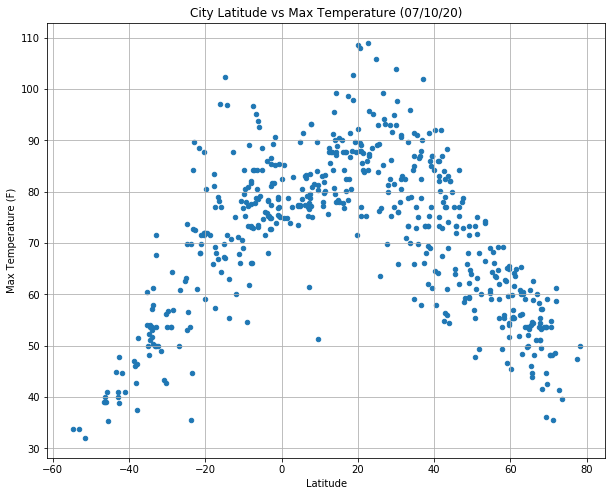

In [7]:
# Generate a scatter plot of lattitude vs max temperature

# create a scatter plot of the data

weather_df.plot(kind="scatter", x="Latitude", y="Max Temperature (F)", grid=True, figsize=(10,8), title="City Latitude vs Max Temperature (07/10/20)")

plt.show()

## Latitude vs. Humidity Plot

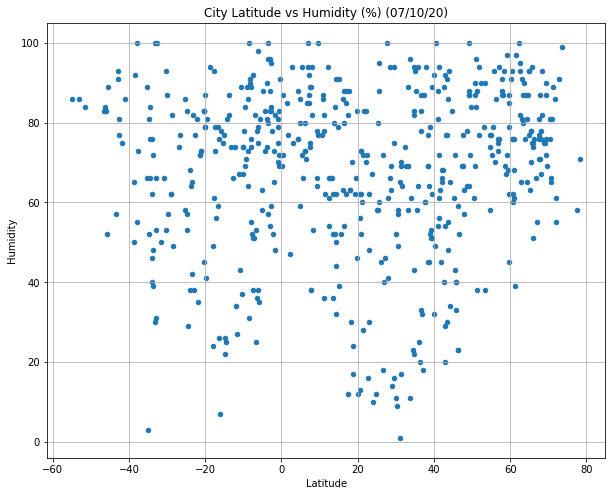

In [8]:

# create a scatter plot of the data

weather_df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(10,8), title="City Latitude vs Humidity (%) (07/10/20)")

plt.show()

## Latitude vs. Cloudiness Plot

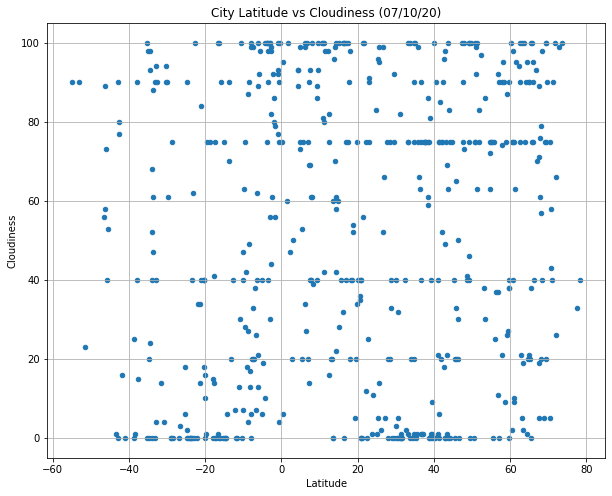

In [9]:
# create a scatter plot of the data

weather_df.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, figsize=(10,8), title="City Latitude vs Cloudiness (07/10/20)")

plt.show()

## Latitude vs. Wind Speed Plot

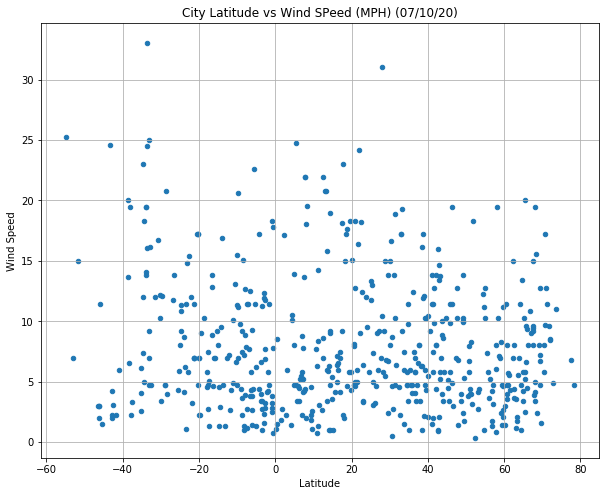

In [10]:
# create a scatter plot of the data

weather_df.plot(kind="scatter", x="Latitude", y="Wind Speed", grid=True, figsize=(10,8), title="City Latitude vs Wind SPeed (MPH) (07/10/20)")

plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [11]:
# Create Northern and Southern Hemisphere DataFrames
southern_df = weather_df.loc[weather_df['Latitude'] <= 0.0]
southern_df
northern_df = weather_df.loc[weather_df['Latitude'] > 0.0]
northern_df

,City,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed,Country,Date
2,Polunochnoye,60.87,60.42,61.54,68,10,3.94,RU,1594660076
4,Grindavik,63.84,-22.43,53.60,76,75,6.93,IS,1594660076
6,Pokrovskoye,47.42,38.90,78.01,69,100,7.00,RU,1594660077
9,Kapaa,22.08,-159.32,75.20,83,75,24.16,US,1594659842
10,Ponta do Sol,32.67,-17.10,71.01,69,2,2.24,PT,1594659875
...,...,...,...,...,...,...,...,...,...
543,Pishin,30.58,67.00,76.01,49,0,4.61,PK,1594660085
544,Ola,59.58,151.28,51.71,85,38,1.45,RU,1594660124
545,Laï,9.40,16.30,84.04,64,86,4.56,TD,1594660125
546,Tanout,14.97,8.89,90.43,39,28,3.56,NE,1594660125


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.75


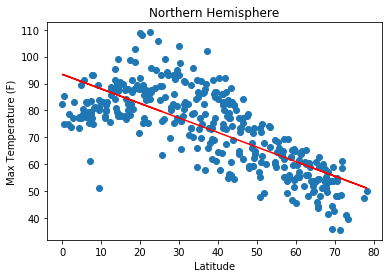

In [12]:

# Generate a scatter plot of lattitude vs max temperature

# create a scatter plot of the data

# Calculate the correlation coefficient and linear regression model 
# the northern hemisphere (latitude vs Max temp)

lat = northern_df.loc[:,'Latitude']
mtemp = northern_df.loc[:,'Max Temperature (F)']

# Generate the pearson coeeficient
correlation = st.pearsonr(lat,mtemp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Set the x and values
x_values = northern_df['Latitude']
y_values = northern_df['Max Temperature (F)']

# Get the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the line using the slope and intercept and print out the formula
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot information
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.82


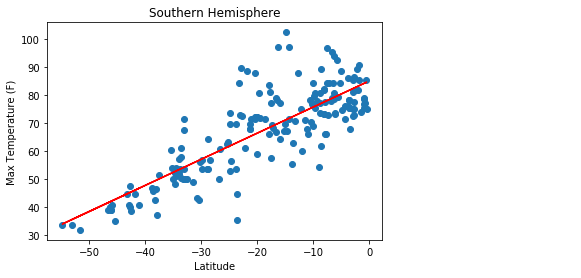

In [13]:
# Generate a scatter plot of lattitude vs max temperature

# Calculate the correlation coefficient and linear regression model 
# the southern hemisphere (latitude vs Max temp)

lat = southern_df.loc[:,'Latitude']
mtemp = southern_df.loc[:,'Max Temperature (F)']

# Generate the pearson coeeficient
correlation = st.pearsonr(lat,mtemp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Set the x and values
x_values = southern_df['Latitude']
y_values = southern_df['Max Temperature (F)']

# Get the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the line using the slope and intercept and print out the formula
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot information
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.17


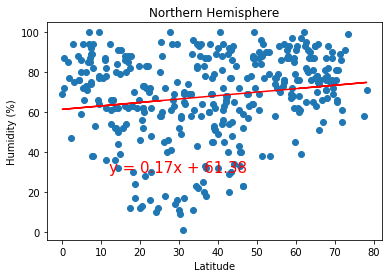

In [14]:
# create a scatter plot of the data

# Calculate the correlation coefficient and linear regression model 
# the northern hemisphere (latitude vs Humidity)

# get the Latitude and Humidity
lat = northern_df.loc[:,'Latitude']
mtemp = northern_df.loc[:,'Humidity']

# Generate the pearson coeeficient
correlation = st.pearsonr(lat,mtemp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Set the x and values
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']

# Get the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the line using the slope and intercept and print out the formula
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot information
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.0


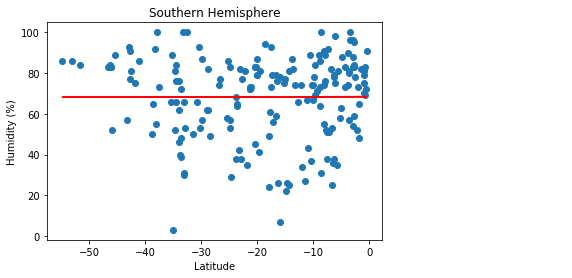

In [15]:
# create a scatter plot of the data

# Calculate the correlation coefficient and linear regression model 
# the northern hemisphere (latitude vs Humidity)

lat = southern_df.loc[:,'Latitude']
mtemp = southern_df.loc[:,'Humidity']

# Generate the pearson coeeficient
correlation = st.pearsonr(lat,mtemp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Set the x and values
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']

# Get the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the line using the slope and intercept and print out the formula
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot information
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.01


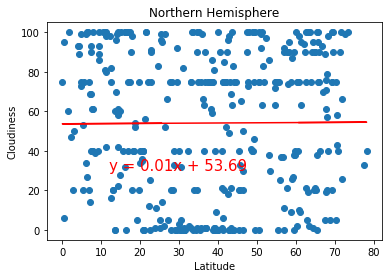

In [16]:
# create a scatter plot of the data

# Calculate the correlation coefficient and linear regression model 
# the northern hemisphere (latitude vs Cloudiness)

lat = northern_df.loc[:,'Latitude']
mtemp = northern_df.loc[:,'Cloudiness']

# Generate the pearson coeeficient
correlation = st.pearsonr(lat,mtemp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Set the x and values
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']

# Get the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the line using the slope and intercept and print out the formula
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot information
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere')
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.13


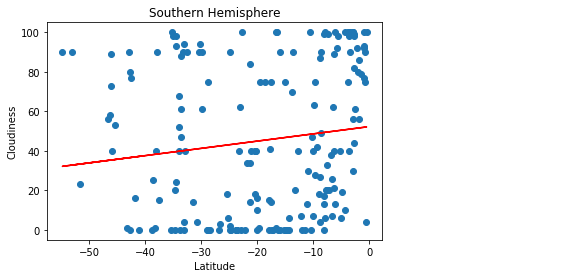

In [17]:
# create a scatter plot of the data

# Calculate the correlation coefficient and linear regression model 
# the southern hemisphere (latitude vs Cloudiness)

lat = southern_df.loc[:,'Latitude']
mtemp = southern_df.loc[:,'Cloudiness']

# Generate the pearson coeeficient
correlation = st.pearsonr(lat,mtemp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Set the x and values
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']

# Get the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the line using the slope and intercept and print out the formula
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot information
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere')
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.08


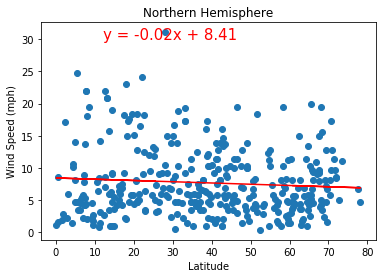

In [18]:
# create a scatter plot of the data

# Calculate the correlation coefficient and linear regression model 
# the northern hemisphere (latitude vs Wind Speed)


lat = northern_df.loc[:,'Latitude']
mtemp = northern_df.loc[:,'Wind Speed']

# Generate the pearson coeeficient
correlation = st.pearsonr(lat,mtemp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Set the x and values
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']

# Get the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the line using the slope and intercept and print out the formula
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot information
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere')
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.23


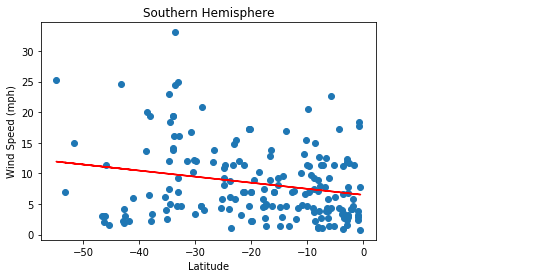

In [19]:
# create a scatter plot of the data

# Calculate the correlation coefficient and linear regression model 
# the southern hemisphere (latitude vs Wind Speed)

lat = southern_df.loc[:,'Latitude']
mtemp = southern_df.loc[:,'Wind Speed']

# Generate the pearson coeeficient
correlation = st.pearsonr(lat,mtemp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Set the x and values
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']

# Get the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the line using the slope and intercept and print out the formula
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot information
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere')
plt.show()
